In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/heart_stroke.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
data2 = data.dropna()

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29072 entries, 1 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29072 non-null  int64  
 1   gender             29072 non-null  object 
 2   age                29072 non-null  float64
 3   hypertension       29072 non-null  int64  
 4   heart_disease      29072 non-null  int64  
 5   ever_married       29072 non-null  object 
 6   work_type          29072 non-null  object 
 7   Residence_type     29072 non-null  object 
 8   avg_glucose_level  29072 non-null  float64
 9   bmi                29072 non-null  float64
 10  smoking_status     29072 non-null  object 
 11  stroke             29072 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.9+ MB


In [8]:
data2.head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,63732,Male,70.0,1,0,Yes,Self-employed,Urban,251.60,27.1,never smoked,0
140,9608,Male,24.0,0,0,No,Private,Urban,123.10,37.9,never smoked,0
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
142,10504,Male,55.0,0,0,Yes,Govt_job,Rural,97.40,44.6,formerly smoked,0


Text(0.5, 0, 'Age')

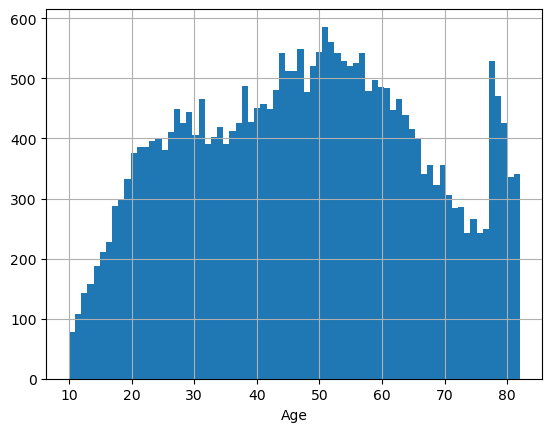

In [9]:
data2.age.hist(bins=data2.age.nunique())
plt.xlabel('Age')

<Figure size 1000x600 with 0 Axes>

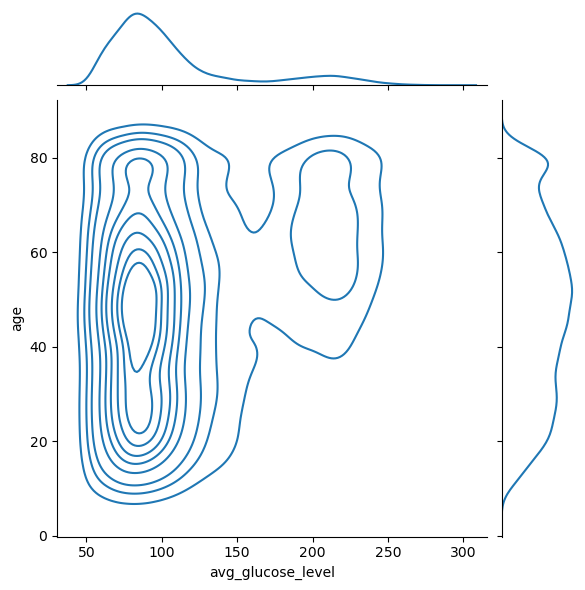

In [42]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data2.avg_glucose_level, y=data2.age, kind='kde')

<Figure size 1000x600 with 0 Axes>

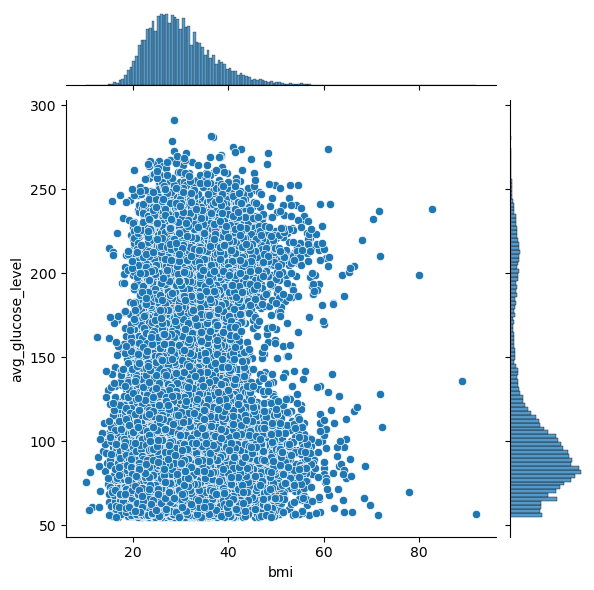

In [11]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data2.bmi, y=data2.avg_glucose_level)

<Figure size 1000x600 with 0 Axes>

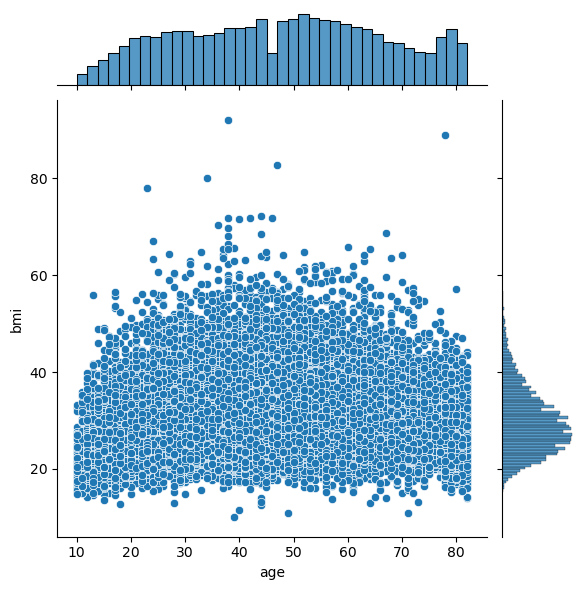

In [12]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data2.age, y=data2.bmi)

In [13]:
data3 = pd.get_dummies(data2, dtype=float)

In [14]:
data3.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,30468,58.0,1,0,87.96,39.2,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,56543,70.0,0,0,69.04,35.9,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,52800,52.0,0,0,77.59,17.7,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,41413,75.0,0,1,243.53,27.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,15266,32.0,0,0,77.67,32.3,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
data3.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,...,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000
mean,37079.469455,47.671746,0.111482,0.052146,106.403225,30.054166,0.018850,0.614062,0.385698,0.000241,...,0.144331,0.003474,0.651968,0.179004,0.021223,0.497971,0.502029,0.244187,0.541655,0.214158
std,20965.429393,18.734490,0.314733,0.222326,45.268512,7.193908,0.135997,0.486825,0.486768,0.015516,...,0.351431,0.058840,0.476355,0.383362,0.144130,0.500004,0.500004,0.429611,0.498270,0.410244
min,1.000000,10.000000,0.000000,0.000000,55.010000,10.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19046.750000,32.000000,0.000000,0.000000,77.627500,25.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37444.000000,48.000000,0.000000,0.000000,92.130000,28.900000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,55220.250000,62.000000,0.000000,0.000000,113.910000,33.900000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,92.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29072 entries, 1 to 43399
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29072 non-null  int64  
 1   age                             29072 non-null  float64
 2   hypertension                    29072 non-null  int64  
 3   heart_disease                   29072 non-null  int64  
 4   avg_glucose_level               29072 non-null  float64
 5   bmi                             29072 non-null  float64
 6   stroke                          29072 non-null  int64  
 7   gender_Female                   29072 non-null  float64
 8   gender_Male                     29072 non-null  float64
 9   gender_Other                    29072 non-null  float64
 10  ever_married_No                 29072 non-null  float64
 11  ever_married_Yes                29072 non-null  float64
 12  work_type_Govt_job              29072

In [17]:
X = data3.drop(columns=['stroke'])
y = data3['stroke']

In [18]:
def get_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
get_score(model, X_train, y_train, X_test, y_test, train=True)
get_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.11%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.981123    1.000000  0.981124      0.990562      0.981480
recall         1.000000    0.002273  0.981124      0.501136      0.981124
f1-score       0.990472    0.004535  0.981124      0.497503      0.971819
support    22817.000000  440.000000  0.981124  23257.000000  23257.000000
_______________________________________________
Confusion Matrix: 
 [[22817     0]
 [  439     1]]

Test Result:
Accuracy Score: 98.11%
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.981421    0.0  0.981083     0.490710      0.963193
recall        0.999650    0.0  0.981083     0.499825      0.981083
f1-score      0.990451    0.0  0.981083     0.495226      0.972056
support    5707.000000  108.0  0.981083  5815.0

In [37]:
y_pred = model.predict(X_test)

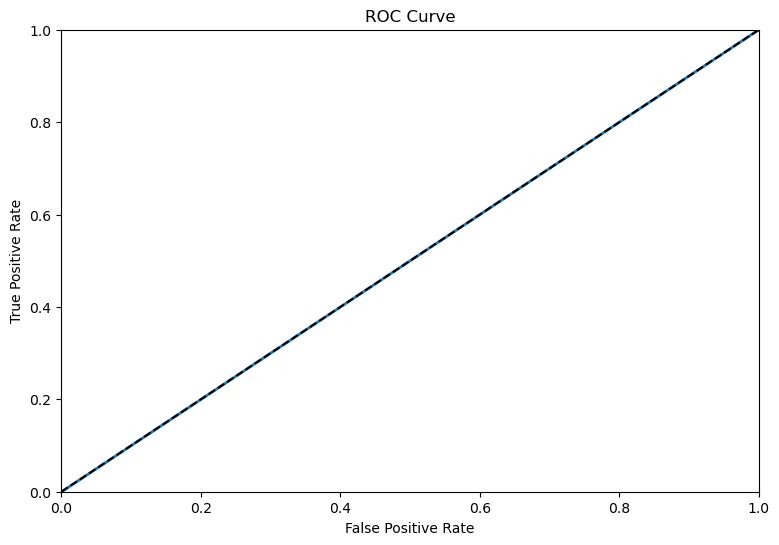

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5707
           1       0.00      0.00      0.00       108

    accuracy                           0.98      5815
   macro avg       0.49      0.50      0.50      5815
weighted avg       0.96      0.98      0.97      5815

